In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IsoFlex
%load_ext autoreload
%autoreload 2


In [3]:
W = np.zeros((1000,1000))
W[:,500-25:500+25] = 2e6 / 50
I = IsoFlex.flexural(W, Nx = 0, Ny = 0, Nxy = 0, dx=1000, dy=1000, Te = 30e3);
w_line1 = I[500,:];

NameError: name 'w_line1' is not defined

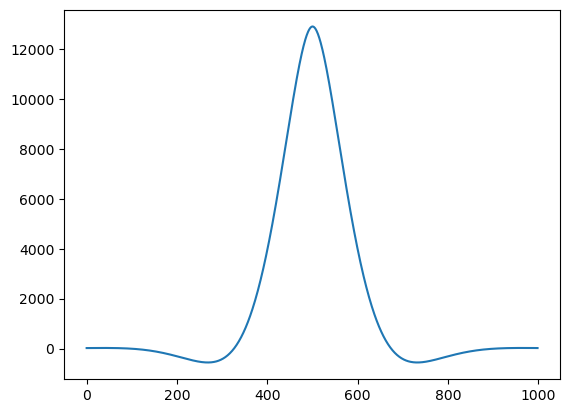

In [2]:
pm = 3300
pc = 2750
Te = 30000
v = .25
Nx = -100e12
E = 100e9
g = 9.81
D0 = E * Te**3 / (12 * (1 - v ** 2))
dRho = pm-pc
V0 = 2e6 * 2750* 9.81 * 1000 #* 3300/(3300-2750) #(3300/(3300-2750)) #load .1e6 meter * density 2750 *  g * 1000m (x-)

beta =  ((3300 * g / (4*D0)) ** .5 + (Nx / (4*D0))) ** -.5
gamma = ((3300 * g / (4*D0)) ** .5 - (Nx / (4*D0))) ** -.5
alpha = (4 * D0 / (3300 * g)) ** .25

we = V0 / (2 * alpha**2 * 3300 * g)
wl = V0 * alpha**3 / (7 * D0 )

x = np.arange(-1e6/2,1e6/2-1000,1000)
w0 = np.real(wl * np.exp( - np.abs(x) / alpha ) * ( np.cos( x / alpha ) + np.sin(abs(x) / alpha) ))
w = np.real(we * np.exp( - np.abs(x) / beta ) * ( beta * np.cos( x / gamma ) + gamma * np.sin(np.abs(x) / gamma) )) #(eq. 13, garcia sandwell 2013)
w_crack = np.real(-2 * wl * np.exp(-abs(x) / alpha) * np.cos(x/alpha))
plt.plot(w0)
plt.plot(w_line1)

## Viscoelastic_lith

In [3]:
W = np.zeros((500,500))
W[:,250-25:250+25] = 2e6 / 50
lins=[]
def1=[]
tdef=[]
w_line1=0
for i in range(10):
    if i == 0:
        I, def1, tdef = IsoFlex.viscoelastic_lith(W, Nx = 0, Ny = 0, Nxy = 0,
                                      dx=1000, dy=1000, Te = 30e3, t=i*1e6, dt=1e6,def1=def1,tdef=tdef,T0=10e6)
        I, def1, tdef = IsoFlex.viscoelastic_lith(W, Nx = 0, Ny = 0, Nxy = 0,
                                      dx=1000, dy=1000, Te = 30e3, t=i*1e6, dt=1e6,def1=def1,tdef=tdef,T0=10e6)
    else:
        I, def1, tdef = IsoFlex.viscoelastic_lith(W*0, Nx = 0, Ny = 0, Nxy = 0,
                                  dx=1000, dy=1000, Te = 30e3, t=i*1e6, dt=1e6,def1=def1,tdef=tdef,T0=5e6)
    w_line1 += I[250,:]
    lins.append(w_line1.copy())
    print(i)

0
1
2
3
4
5
6
7
8
9


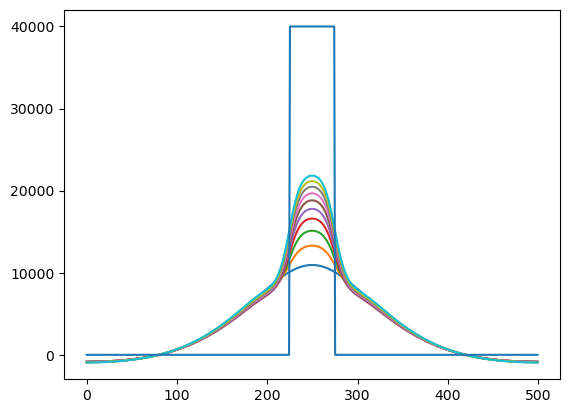

In [22]:
for i in range(len(lins)):
    plt.plot(lins[i])
plt.plot(W[250,:])

## Viscoelastic_mantle

In [130]:
W = np.zeros((500,500))
W[:,250-25:250+25] = 2e6 / 50
lins=[]
def1=[]
tdef=[]
w_line1=0
for i in range(30):
    if i == 0:
        I, def1, tdef = IsoFlex.viscoelastic_mantle(W/30, Nx = 0, Ny = 0, Nxy = 0,
                                      dx=1000, dy=1000, Te = 3e3, t=i*1e3, dt=1e3,def1=def1,tdef=tdef,T0=15e3)

    else:
        I, def1, tdef = IsoFlex.viscoelastic_mantle(W/30, Nx = 0, Ny = 0, Nxy = 0,
                                  dx=1000, dy=1000, Te = 3e3, t=i*1e3, dt=1e3,def1=def1,tdef=tdef,T0=15e3)
        _, def1, tdef = IsoFlex.viscoelastic_mantle(W/30, Nx = 0, Ny = 0, Nxy = 0,
                                      dx=1000, dy=1000, Te = 3e3, t=i*1e3, dt=1e3,def1=def1,tdef=tdef,T0=15e3,pc=50)
    w_line1 += I[250,:]
    lins.append(w_line1.copy())
    print(i)


(500, 500)
0.0
0
0
(500, 500)
1.0
1
(500, 500)
1.0
2
1
(500, 500)
2.0
2
(500, 500)
2.0
3
2
(500, 500)
3.0
3
(500, 500)
3.0
4
3
(500, 500)
4.0
4
(500, 500)
4.0
5
4
(500, 500)
5.0
5
(500, 500)
5.0
6
5
(500, 500)
6.0
6
(500, 500)
6.0
7
6
(500, 500)
7.0
7
(500, 500)
7.0
8
7
(500, 500)
8.0
8
(500, 500)
8.0
9
8
(500, 500)
9.0
9
(500, 500)
9.0
10
9
(500, 500)
10.0
10
(500, 500)
10.0
11
10
(500, 500)
11.0
11
(500, 500)
11.0
12
11
(500, 500)
12.0
12
(500, 500)
12.0
13
12
(500, 500)
13.0
13
(500, 500)
13.0
14
13
(500, 500)
14.0
14
(500, 500)
14.0
15
14
(500, 500)
15.0
15
(500, 500)
15.0
16
15
(500, 500)
16.0
16
(500, 500)
16.0
17
16
(500, 500)
17.0
17
(500, 500)
17.0
18
17
(500, 500)
18.0
18
(500, 500)
18.0
19
18
(500, 500)
19.0
19
(500, 500)
19.0
20
19
(500, 500)
20.0
20
(500, 500)
20.0
21
20
(500, 500)
21.0
21
(500, 500)
21.0
22
21
(500, 500)
22.0
22
(500, 500)
22.0
23
22
(500, 500)
23.0
23
(500, 500)
23.0
24
23
(500, 500)
24.0
24
(500, 500)
24.0
25
24
(500, 500)
25.0
25
(500, 500)
25.0
26
25


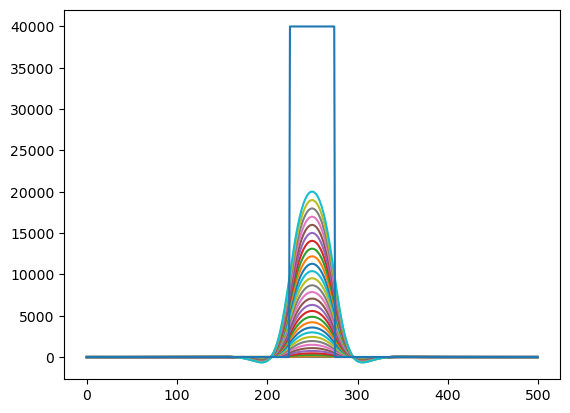

In [131]:
for i in range(len(lins)):
    plt.plot(lins[i])

plt.plot(W[250,:])

In [97]:
np.max(W)

40000.0